# Dollars and Votes


You're a reporter at [Mission Local](https://missionlocal.org/) an independent San Francisco-based news site. The [results have just come in](https://missionlocal.org/2024/03/election-results-march-2024-dccc-assembly-props-court-maps-live-updates/) for local elections that were held on March 5, 2024 One of the things on the ballot is the DCCC election, a committee that governs the local Democratic Party. 

Here's a bit of background information from the San Francisco Chronicle:

> Colloquially referred to as the “D-triple-C,” the DCCC governs the local Democratic Party. It’s made up of 24 elected members — 14 from the 17th Assembly District, which encompasses San Francisco’s east side, and 10 from the 19th Assembly District, which includes the city’s west side. It also has eight “ex-officio” members, consisting of San Francisco Democrats elected to state and federal offices.
>
> Every four years — during the primary election of a presidential election year — all elected DCCC seats are up for grabs and can be voted on by registered Democrats in San Francisco. 
>
> Often, this is a rather dull affair. Although the DCCC can be a stepping stone to higher office, it can nevertheless be a tough sell to potential candidates: The job has no salary, and it’s known for being a cutthroat political environment. 
>
> This year, however, the DCCC race is a marquee attraction. 
> 
> More than $2 million has been poured into the race by backers of the two main groups, or slates, of DCCC candidates — a potentially record sum. Most of that money comes from moderate tech-affiliated and labor groups supporting a moderate slate called SF Democrats for Change, which promises to restore “common sense” to a DCCC that it accuses of taking positions “out of sync with San Francisco voters,” including “defunding public safety initiatives” and refusing to take a stance on the 2022 school board recall. Labor groups, meanwhile, are backing the progressive Labor and Working Families slate, which promises to fight for a San Francisco “that works for everyone, not just the billionaires” and to protect the city from a reversion “back to failed Reagan-era policies.”
>
> There are 30 candidates running for 14 seats in the 17th district and 21 candidates fighting for 10 spots in the 19th.
> 
> Most of these candidates are running on the big slates. There are practical reasons for this: It’s extremely expensive for individual candidates to send out campaign mailers and ads. By joining forces and pooling funds, candidates can reach more people at a lower cost and benefit from the name recognition and political expertise of better-known contenders. 



[Source: San Francisco Chronicle](https://www.sfchronicle.com/opinion/article/democratic-county-central-committee-18682320.php)

You want write an article about the role money played in this election. So you download the data and start analyzing. **Did dollars buy votes in this election?**



## Setup 

(you can skip this part, it just sets up the notebook)

In [104]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

This is a Python notebook, but below is an R cell. The `%%R` at the top of the cell indicates that the code in this cell will be R code.

In [106]:
%%R

# My commonly used R imports

require('tidyverse')

## Load the data

In [107]:
df = pd.read_csv('dccc_data.csv')
df

,candidate,amount_raised,slate,count,votes,race,won,district
0,Adolfo Velasquez,17453,progressive,23462,25.662004,DCCC,False,District 17
1,Anita Martinez,16572,progressive,26251,28.712525,DCCC,False,District 17
2,Bilal Mahmood,274675,moderate,33841,37.014230,DCCC,True,District 17
3,Brian Quan,52817,moderate,20938,29.512171,DCCC,False,District 19
4,Carrie Barnes,141043,moderate,30140,32.966192,DCCC,True,District 17
5,Catherine Stefani,121736,moderate,35676,50.285424,DCCC,True,District 19
6,Cedric Akbar,37666,moderate,28805,31.506010,DCCC,True,District 17
7,Connie Chan,61276,progressive,23036,32.469308,DCCC,True,District 19
8,Dan Calamuci,58752,moderate,21090,29.726415,DCCC,True,District 19
9,Emma Heiken,53969,moderate,32678,35.742177,DCCC,True,District 17


## Clean

In [108]:
%%R -i df 

# give labels to the binary won column
df$won <- factor(df$won, levels=c(FALSE, TRUE), labels=c("Lost", "Won"))

# fill na slate with 'Neither'
df$slate <- ifelse(is.na(df$slate), 'Neither', df$slate)

## Analysis

In this section, use exploratory data analysis, as well as the statistical tools you've learned so far (t-test, chi-sq test, regression) to help you answer the question. 

Did money buy votes?

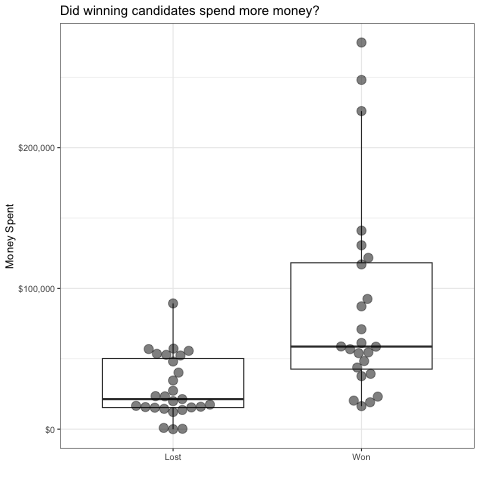

In [109]:
%%R 

library(ggbeeswarm)

ggplot(df) + 
    aes(x=won, y=amount_raised) + 
    # boxplot without outliers
    geom_boxplot(outlier.shape = NA) +
    geom_beeswarm(cex=2.5, alpha=.5, size=4) + 
    # stop showing y axis in scientific notation, it's money
    scale_y_continuous(labels = scales::dollar) +
    labs(title="Did winning candidates spend more money?", x="", y="Money Spent") + 
    theme_bw()

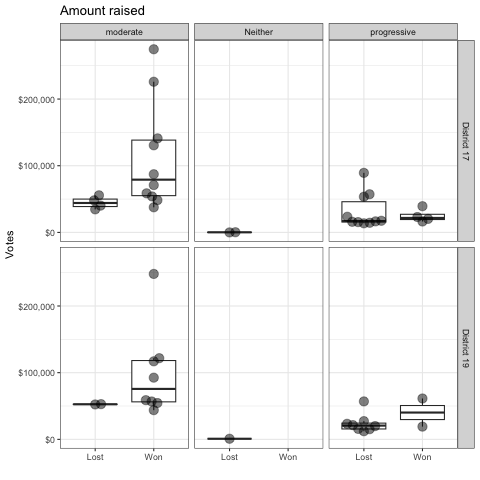

In [110]:
%%R 

library(ggbeeswarm)


ggplot(df %>% filter(!is.na(slate))) + 
    aes(x=won, y=amount_raised) + 
    geom_boxplot(outlier.shape = NA) +
    geom_beeswarm(cex=5, alpha=.5, size=4) + 
    scale_y_continuous(labels = scales::dollar) +
    facet_grid(district~slate) +
    labs(title="Amount raised", x="", y="Votes") + 
    theme_bw()

`geom_smooth()` using formula = 'y ~ x'


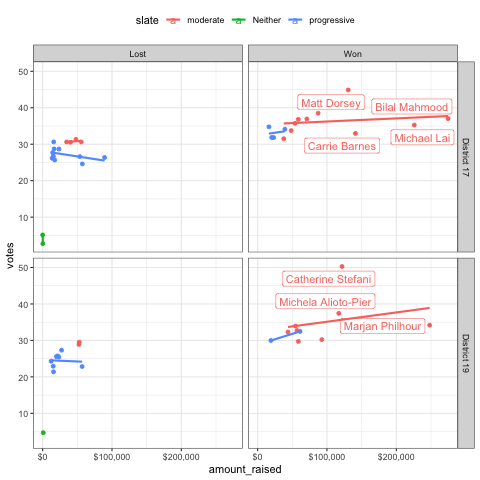

In [111]:
%%R

library(ggrepel)

ggplot(df %>% filter(!is.na(slate))) + 
    aes(x=amount_raised, y=votes, color=slate) + 
    geom_point() +
    scale_x_continuous(labels = scales::dollar) +
    geom_label_repel(aes(label=candidate), max.overlaps=4, data=df %>% filter(amount_raised > 100000)) + 
    geom_smooth(method="lm", se=FALSE) +
    theme_bw() + 
    theme(
        legend.position="top"
    ) +
    facet_grid(district~won)

In [112]:
%%R 

model <- lm(votes ~ amount_raised + slate, data=df)
summary(model)


Call:
lm(formula = votes ~ amount_raised + slate, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-5.889 -2.623 -1.081  2.335 15.158 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.218e+01  1.398e+00  23.019  < 2e-16 ***
amount_raised     2.424e-05  1.212e-05   2.001 0.051236 .  
slateNeither     -2.800e+01  2.766e+00 -10.123 2.16e-13 ***
slateprogressive -5.272e+00  1.419e+00  -3.715 0.000539 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.138 on 47 degrees of freedom
Multiple R-squared:  0.7674,	Adjusted R-squared:  0.7525 
F-statistic: 51.67 on 3 and 47 DF,  p-value: 6.419e-15



`geom_smooth()` using formula = 'y ~ x'


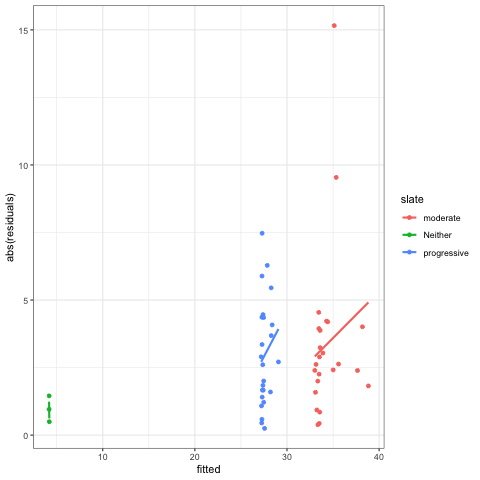

In [123]:
%%R 

# add fitted and residual values to the data
df <- df %>% 
    mutate(
        fitted = fitted(model), 
        residuals = residuals(model)
    )


# plot the model residuals

ggplot(df) +
    aes(x=fitted, y=abs(residuals), color=slate) +
    geom_point() +
    geom_smooth(method='lm', se=F) +
    theme_bw()

# color by slate to show what's up here...
# show the residuals squared



In [97]:
%%R 

model <- lm(votes ~ amount_raised + slate + district, data=df)
summary(model)


Call:
lm(formula = votes ~ amount_raised + slate + district, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8768 -2.9285 -0.8268  1.9798 16.1919 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)

    
(Intercept)          3.295e+01  1.473e+00  22.368  < 2e-16 ***
amount_raised        2.372e-05  1.196e-05   1.983  0.05340 .  
slateNeither        -2.820e+01  2.733e+00 -10.316  1.5e-13 ***
slateprogressive    -5.305e+00  1.401e+00  -3.787  0.00044 ***
districtDistrict 19 -1.746e+00  1.163e+00  -1.501  0.14021    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.084 on 46 degrees of freedom
Multiple R-squared:  0.7782,	Adjusted R-squared:  0.7589 
F-statistic: 40.35 on 4 and 46 DF,  p-value: 1.71e-14



## Conclusions and Questions

Based on your analysis above, what conclusions can you draw?

What reporting questions do you have?